In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = "/content/drive/MyDrive/cat vs dog"

In [ ]:
filenames = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]

In [ ]:
labels = ['cat' if filename.split('/')[-1].startswith('cat') else 'dog' for filename in filenames]

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': filenames, 'class': labels}),
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': filenames, 'class': labels}),
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

ValueError: If class_mode="binary" there must be 2 classes. Found 1 classes.

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=10,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))
test_loss, test_acc = model.evaluate(validation_generator, steps=len(validation_generator))
print('Test accuracy:', test_acc)

Epoch 1/10
28/28 [==============================] - 6s 226ms/step - loss: 0.5572 - accuracy: 0.7437 - val_loss: 2.3770 - val_accuracy: 0.0432
Epoch 2/10
28/28 [==============================] - 5s 196ms/step - loss: 0.5967 - accuracy: 0.6989 - val_loss: 1.1563 - val_accuracy: 0.0863
Epoch 3/10
28/28 [==============================] - 6s 232ms/step - loss: 0.8169 - accuracy: 0.6649 - val_loss: 2.4424 - val_accuracy: 0.0000e+00
Epoch 4/10
28/28 [==============================] - 6s 203ms/step - loss: 0.6400 - accuracy: 0.6237 - val_loss: 1.3554 - val_accuracy: 0.0719
Epoch 5/10
28/28 [==============================] - 6s 205ms/step - loss: 0.5596 - accuracy: 0.7366 - val_loss: 0.9175 - val_accuracy: 0.4101
Epoch 6/10
28/28 [==============================] - 6s 229ms/step - loss: 0.6035 - accuracy: 0.6703 - val_loss: 0.6677 - val_accuracy: 0.9496
Epoch 7/10
28/28 [==============================] - 6s 206ms/step - loss: 0.6816 - accuracy: 0.4642 - val_loss: 1.2513 - val_accuracy: 0.1799
Ep

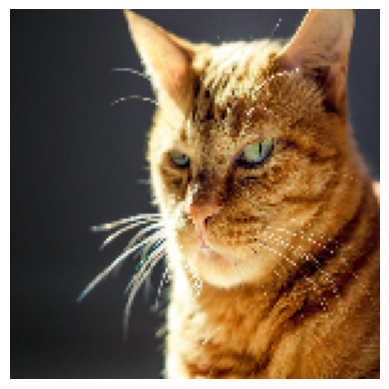

1/1 [==============================] - 0s 49ms/step
Predicted class: Cat


In [ ]:
def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Cat'
    else:
        return 'Dog'

image_path = '/content/drive/MyDrive/dog cat/cat_97.jpg'
predicted_class = predict_image_class(image_path, model)
print("Predicted class:", predicted_class)